In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from itertools import combinations
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [2]:
n_particles = 100                       # number of particles 
r = np.random.random((2,n_particles))   # postion of particle(x,y)
ixr = r[0]>0.5                          # particles to right to 0.5 
ixl = r[0]<=0.5                         # left side 

In [3]:
ids = np.arange(n_particles)            # id of prticle

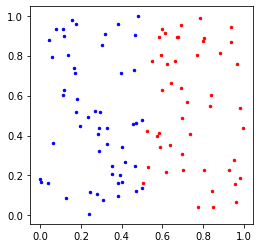

In [4]:
# plot the initial position of particles  
plt.figure(figsize=(4,4))
plt.scatter(r[0][ixr],r[1][ixr],c='r',s=6)
plt.scatter(r[0][ixl],r[1][ixl],c='b',s=6)

In [5]:
# intitial velocity of particles 
v=np.zeros((2,n_particles))
v[0][ixr]=-200
v[0][ixl]= 200

In [6]:
ids_pairs = np.asarray(list(combinations(ids,2))) # id pairs 

In [7]:
x_pairs =  np.asarray(list(combinations(r[0],2))) # x_pairs
y_pairs =  np.asarray(list(combinations(r[1],2))) # y_pairs 
dx_pairs = np.diff(x_pairs,axis=1).ravel()        # x seperation between pairs 
dy_pairs = np.diff(y_pairs,axis=1).ravel()        # y sep. between pairs 
d_pairs  = np.sqrt(dx_pairs**2 + dy_pairs**2)     # sep. between pairs 

In [8]:
radius = 0.025                                    # radius of particle 
ids_pairs_collide = ids_pairs[d_pairs<2*radius]   # particle ids collide 

In [9]:
# velocity and the postion of particle before the collision 
v1 = v[:,ids_pairs_collide[:,0]]
v2 = v[:,ids_pairs_collide[:,1]]
r1 = r[:,ids_pairs_collide[:,0]]
r2 = r[:,ids_pairs_collide[:,1]]

In [10]:
# velocity after the collison 
v1_new = v1-(np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2,axis=0))*(r1-r2)
v2_new = v2-(np.diag((v2-v1).T@(r2-r1))/np.sum((r2-r1)**2,axis=0))*(r2-r1)

In [11]:
# define fucntions to run the simulations easier 
def get_delta_pairs(x):
    return np.diff(np.asarray(list(combinations(x,2))), axis=1).ravel()
def get_deltad_pairs(r):
    return np.sqrt(get_delta_pairs(r[0])**2 + get_delta_pairs(r[1])**2)
def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2, axis=0) * (r1-r2)
    v2new = v2 - np.diag((v2-v1).T@(r2-r1))/np.sum((r2-r1)**2, axis=0) * (r2-r1)
    return v1new, v2new

In [12]:
# upadte the postion and velocity of paricles 
def motion(r,v,id_pairs,ts,dt,d_cutoff):
    rs = np.zeros((ts,r.shape[0],r.shape[1]))
    vs = np.zeros((ts,v.shape[0],v.shape[1]))
    # initial states 
    rs[0]=r.copy()
    vs[0]=v.copy()
    for i in range(1,ts):
        ic=id_pairs[get_deltad_pairs(r)<d_cutoff]
        v[:,ic[:,0]],v[:,ic[:,1]]=compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], 
                                                r[:,ic[:,0]], r[:,ic[:,1]])
        v[0,r[0]>1]= -np.abs(v[0,r[0]>1])
        v[0,r[0]<0]= -np.abs(v[0,r[0]<0])
        v[1,r[1]>1]= -np.abs(v[1,r[1]>1])
        v[1,r[1]<0]= np.abs(v[1,r[1]<0])
        r +=v*dt
        rs[i]=r.copy()
        vs[i]=v.copy()
    return rs,vs

In [13]:
radius = 0.06
rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

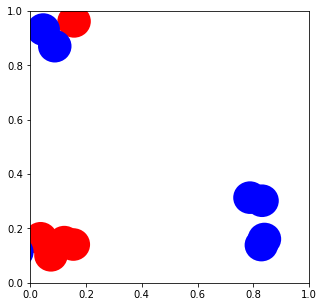

In [14]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

def animate(i):
    ax.clear()
    xred, yred   = rs[i][0][ixr],rs[i][1][ixr]
    xblue, yblue = rs[i][0][ixl],rs[i][1][ixl]
    circles_red  = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xred,yred)]
    circles_blue = [plt.Circle((xi, yi), radius=radius, linewidth=0) for xi,yi in zip(xblue,yblue)]
    cred  = matplotlib.collections.PatchCollection(circles_red, facecolors='red')
    cblue = matplotlib.collections.PatchCollection(circles_blue, facecolors='blue')
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani3.gif',writer='pillow',fps=30,dpi=100)

In [15]:
# simmulate 400 particles 
n_particles = 400
radius = 0.0015
ids = np.arange(n_particles)
r = np.random.random((2,n_particles))
ids_pairs = np.asarray(list(combinations(ids,2)))
v = np.zeros((2,n_particles))

ixr = r[0]>0.5 
ixl = r[0]<=0.5 

v[0][ixr] = -500
v[0][ixl] =  500

rs, vs = motion(r, v, ids_pairs, ts=1000, dt=0.000008, d_cutoff=2*radius)

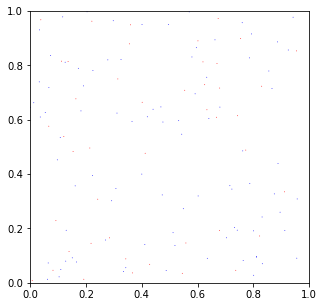

In [16]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ani = animation.FuncAnimation(fig, animate, frames=500, interval=50)
ani.save('ani3.gif',writer='pillow',fps=30,dpi=100)